# Explore Sales Data: Breakfast at the frat

- Identify which are the top Stores per States
- Identify which products are interesting for each category


In [1]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import yaml
from datetime import datetime, timedelta

# Get the current project path (where you open the notebook)
# and go up two levels to get the project path
current_dir = Path.cwd()
proj_path = current_dir.parent.parent

# Catalog contains all the paths related to datasets
with open(os.path.join(proj_path, 'conf/catalog.yml'), "r") as f:
    catalog = yaml.safe_load(f)['olist']
with open(os.path.join(proj_path, 'conf/params.yml'), "r") as f:
    params = yaml.safe_load(f)['olist']

In [2]:
transactions_count = pd.read_csv(os.path.join(proj_path, catalog['output_dir']['dir'], catalog['output_dir']['transactions']))
transactions_sum = pd.read_csv(os.path.join(proj_path, catalog['output_dir']['dir'], catalog['output_dir']['sum_transactions']))

In [3]:
transactions_count

,Unnamed: 0,product_category_name,order_approved_at,payment_value
0,0,agro_industry_and_commerce,2017-01-29,2
1,1,agro_industry_and_commerce,2017-02-05,2
2,2,agro_industry_and_commerce,2017-02-12,2
3,3,agro_industry_and_commerce,2017-02-19,3
4,4,agro_industry_and_commerce,2017-02-26,3
...,...,...,...,...
6027,6027,watches_gifts,2018-08-05,150
6028,6028,watches_gifts,2018-08-12,133
6029,6029,watches_gifts,2018-08-19,115
6030,6030,watches_gifts,2018-08-26,69


In [4]:
sort_by_count = transactions_count.groupby('product_category_name').sum()

In [5]:
sort_by_count.sort_values(by='payment_value', ascending=False)

,Unnamed: 0,payment_value
product_category_name,,
bed_bath_table,67850,11822
health_beauty,371550,9972
sports_leisure,552350,8943
furniture_decor,336950,8741
computers_accessories,132950,8082
...,...,...
arts_and_craftmanship,20026,24
la_cuisine,242055,16
cds_dvds_musicals,43071,14


We have 71 product categories, so we will do 3 columns and 24 rows

# Plots per Category
<!-- 
The following plots are for each category. Each column consists of one store, specified above. Current selection are the top stores for three different states. The X axis will be time and Y axis will be number of units sold.   

- Each column is one store
- Each row is one UPC

The rows are sorted by most units sold total per each category. This suggests to focus on the top rows for choosing which products to use. Another consideration is if the products have sells from 2009-01-14 up to 2010-12-15. Some products may not meet this criteria and some stores might not carry a specific UPC. These will appear as blank plots. 

The data wasn't shown after 2010, as the data in 2011 will be used for testing the models. We don't want to look at how that data looks like. -->

In [6]:
def plot_data(data, ylabel='count'):
    
    sorted_prod = sort_by_count.sort_values(by='payment_value', ascending=False).index

    fig, axes = plt.subplots(nrows=24, ncols=3, figsize=(20,5*24))
    plt.subplots_adjust(hspace=0.8)

    # For every product category, filter the data and plot it
    prod_i = 0
    for row in range(24):
        for col in range(3):
            filtered_data = data[(data['product_category_name']==sorted_prod[prod_i]) &
                                 (data['order_approved_at'] < params['experiment_dates']['test_start'])]

            filtered_data.plot(x='order_approved_at', 
                               y='payment_value',
                               ax=axes[row, col],
                               title=f"Product Category: {sorted_prod[prod_i]}",label=ylabel)
            axes[row, col].set_ylabel(ylabel)
            axes[row, col].set_xlabel('Date')
            
            for label in axes[row, col].get_xticklabels():
                label.set_rotation(40)
                label.set_horizontalalignment('right')
            prod_i += 1
            if prod_i >= len(sorted_prod):
                break
        if prod_i >= len(sorted_prod):
            break

    plt.show()

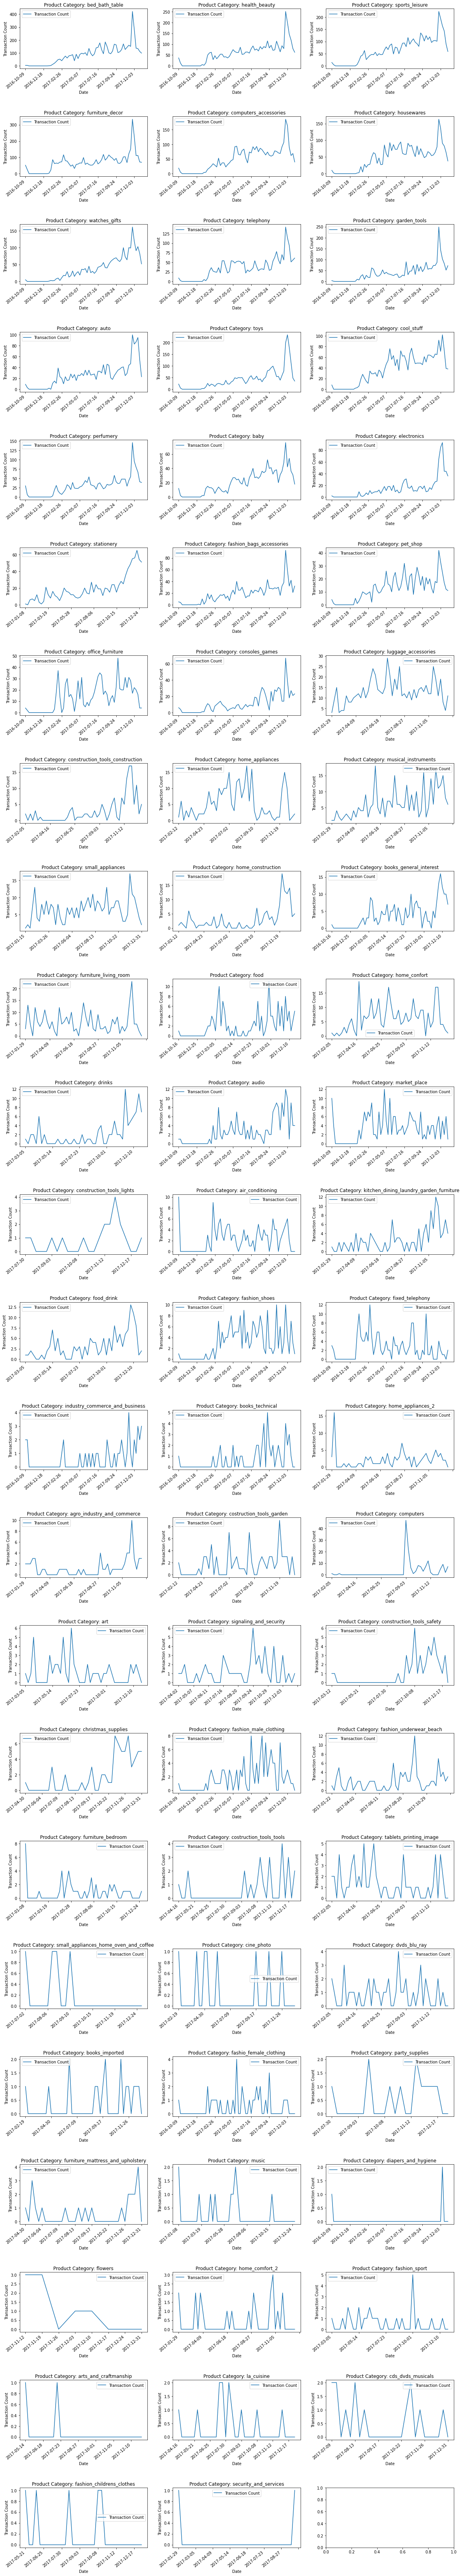

In [7]:
plot_data(transactions_count, ylabel='Transaction Count')

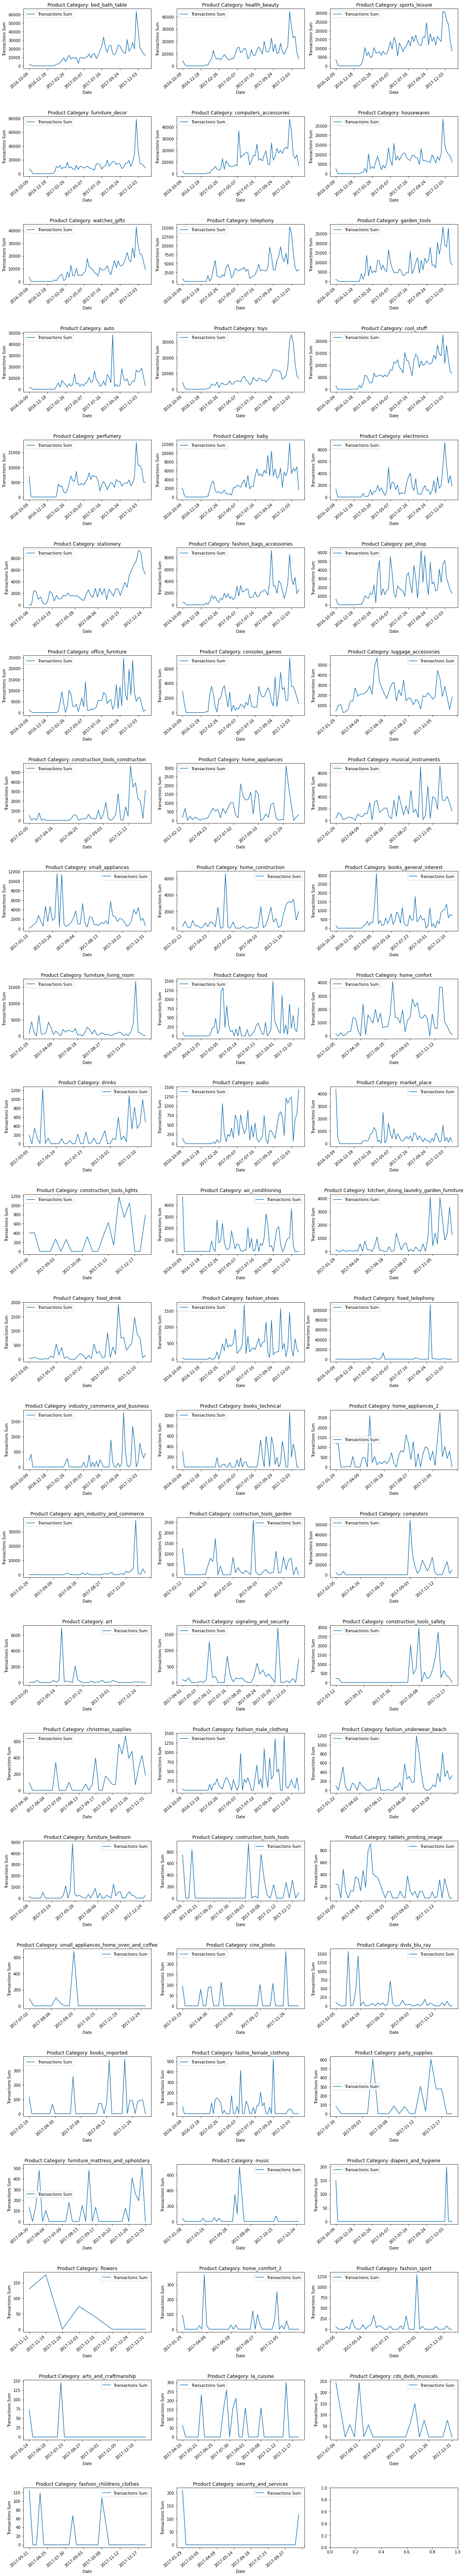

In [8]:
plot_data(transactions_sum, ylabel='Transactions Sum')